In [10]:
!pip install --upgrade imutils

Requirement already up-to-date: imutils in c:\users\yousef\anaconda3\lib\site-packages (0.5.4)


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils

%matplotlib inline

In [4]:
points = {}
velocities = {}
screen_size = ()

In [5]:
video_source = '../DATA/DATA Point 8.mp4'

capture = cv2.VideoCapture(video_source)
fps = capture.get(cv2.CAP_PROP_FPS)
count = 0


while capture.isOpened():
    
    ret, frame = capture.read()
    
    if not ret:
        break
    
    count += 1
    screen_size = frame.shape
#     frame = cv2.copyMakeBorder(
#                  frame, 
#                  1000, 
#                  1000, 
#                  1000, 
#                  1000, 
#                  cv2.BORDER_CONSTANT, 
#                  value=(255, 255, 255)
#               )
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY_INV)[1]
    
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    
 
    for countour in contours:
        if cv2.contourArea(countour) > 500:
            # compute the center of the contour
            moments = cv2.moments(countour)
            if moments["m00"] != 0:
                cX = int(moments["m10"] / moments["m00"])
                cY = int(moments["m01"] / moments["m00"])
            else:
                cX, cY = 0, 0
            points[count / fps] = {"x": cX, "y": frame.shape[1] - cY}
#             print(cX, cY, cv2.contourArea(countour))
            # draw the contour and center of the shape on the image
            cv2.drawContours(frame, [countour], -1, (0, 255, 0), 2)
            cv2.circle(frame, (cX, cY), 7, (255, 255, 255), -1)
            cv2.putText(frame, "center", (cX - 20, cY - 20),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    
#     cv2.imshow("Ball Detection", frame)
#     plt.imshow(frame)
#     plt.show()
    
    key = cv2.waitKey(1) # Maybe 25 if using a file source
    
    
    if key == 27: #Esc key
        break
        
capture.release()
cv2.destroyAllWindows()

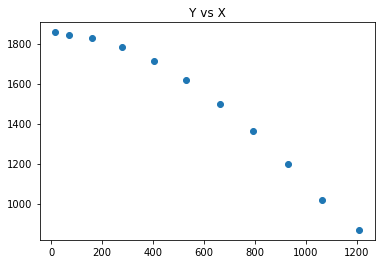

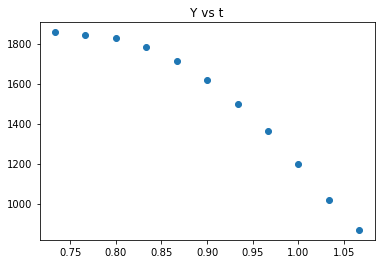

In [6]:
plt.title("Y vs X")
plt.scatter([x["x"] for x in points.values()], [x["y"] for x in points.values()])
plt.show()

plt.title("Y vs t")
plt.scatter(points.keys(), [x["y"] for x in points.values()])
plt.show()

In [7]:
SCREEN_WIDTH = 1.181 # METERS
SCREEN_HEIGHT = 0.665 # METERS

pixel_size_x = SCREEN_WIDTH / screen_size[0]
pixel_size_y = SCREEN_HEIGHT / screen_size[1]

print(pixel_size_x, pixel_size_y)

0.0010935185185185186 0.0003463541666666667


In [8]:
points_keys = list(points.keys())
for i in range(1, len(points_keys)):
    current_key = points_keys[i]
    previous_key = points_keys[i - 1]
    
    dx = points[current_key]["x"] - points[previous_key]["x"]
    dy = points[current_key]["y"] - points[previous_key]["y"]
    dt = current_key - previous_key
    
    vX = (dx * pixel_size_x) / dt
    vY = (dy * pixel_size_y) / dt
    
    velocities[current_key] = {"vX": vX, "vY": vY}

In [9]:
for point in points:
    points[point] = {"x": points[point]["x"] * pixel_size_x, "y": points[point]["y"] * pixel_size_y}

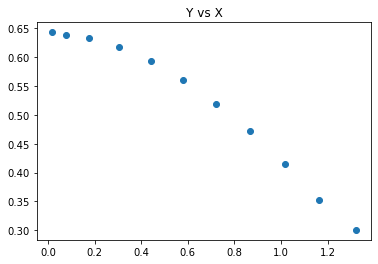

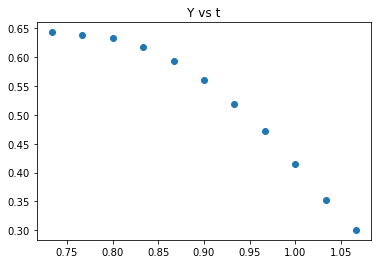

In [11]:
plt.title("Y vs X")
plt.scatter([x["x"] for x in points.values()], [x["y"] for x in points.values()])
plt.show()

plt.title("Y vs t")
plt.scatter(points.keys(), [x["y"] for x in points.values()])
plt.show()

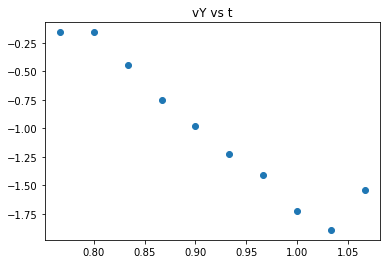

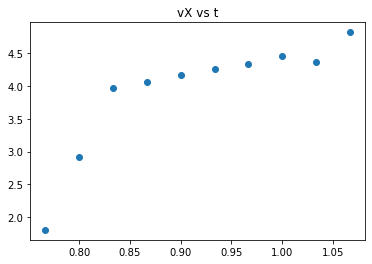

In [10]:
plt.title("vY vs t")
plt.scatter(velocities.keys(), [x["vY"] for x in velocities.values()])
plt.show()

plt.title("vX vs t")
plt.scatter(velocities.keys(), [x["vX"] for x in velocities.values()])
plt.show()